# Decison Tree Assignment 1

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
df.shape

(400, 11)

In [8]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [13]:
# We will convert the sales data into categorical if sales less than 7.5 than low else high 

print(df['Sales'].mean())

for i in range(0,len(df['Sales']),1):
    if df['Sales'].iloc[i] <= 7.5:
        df['Sales'].iloc[i] = 'Low'
    else:
        df['Sales'].iloc[i] = "high"

7.496325000000001


C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_13376\430417008.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'].iloc[i] = "high"


In [14]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,high,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


<Axes: xlabel='Sales', ylabel='count'>

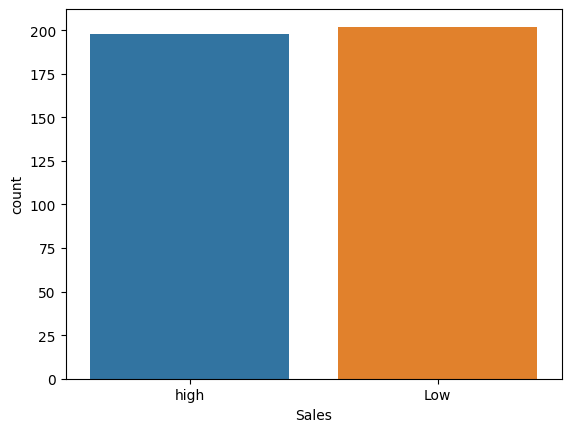

In [16]:
# Sales Count
plt.xlabel("Sales")
plt.ylabel("Count")
sns.countplot(data=df,x = df['Sales'])

<Axes: xlabel='Sales', ylabel='Population'>

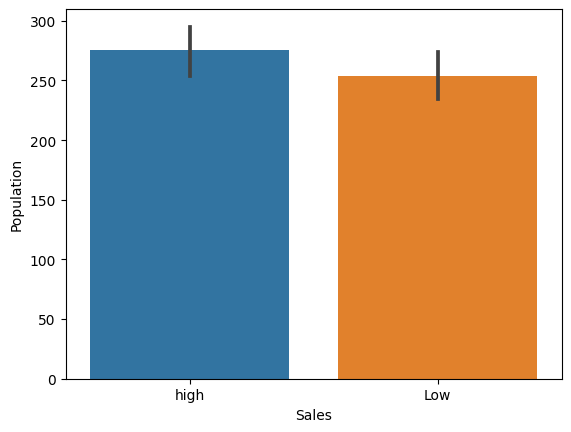

In [17]:
plt.xlabel("Sales")
plt.ylabel("Population")
sns.barplot(data=df, x = df['Sales'], y = df['Population'])

<Axes: xlabel='Price', ylabel='Company Price'>

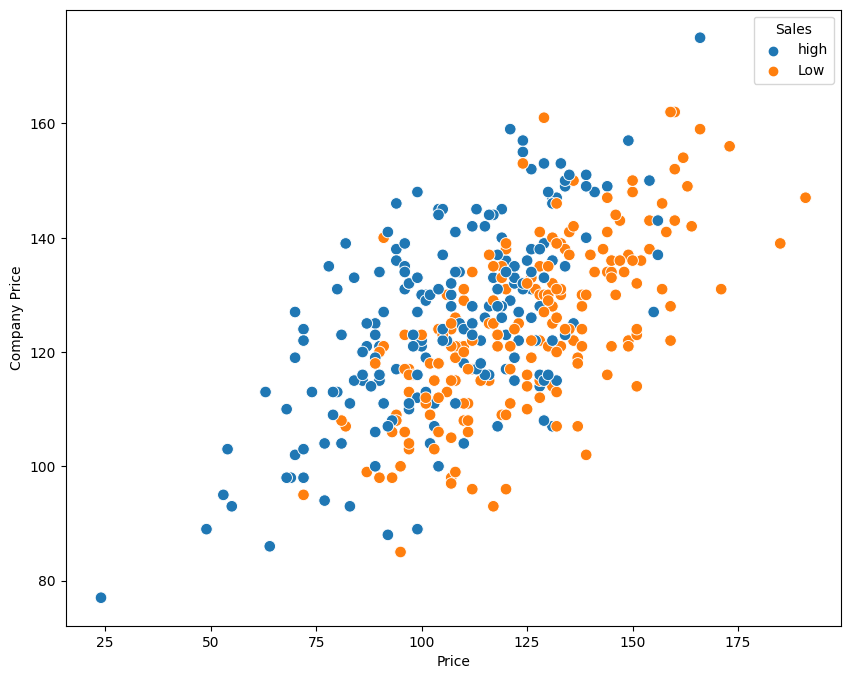

In [22]:
# Checking the relation between Comp_price and Price

plt.figure(figsize=(10,8))
plt.xlabel("Price")
plt.ylabel("Company Price")
sns.scatterplot(data = df, x = df['Price'], y = df['CompPrice'],hue=df['Sales'],s = 70)

In [27]:
# Encoding the  Categorical Variable into Numerical values

from sklearn.preprocessing import LabelEncoder

scale = LabelEncoder()
df['Sales'] = scale.fit_transform(df['Sales'])
df['ShelveLoc'] = scale.fit_transform(df['ShelveLoc'])
df['US'] = scale.fit_transform(df['US'])
df['Urban'] = scale.fit_transform(df['Urban'])

In [28]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


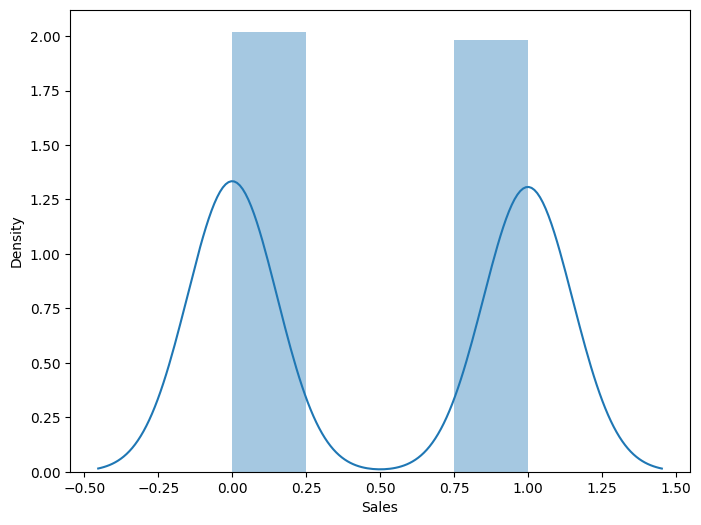

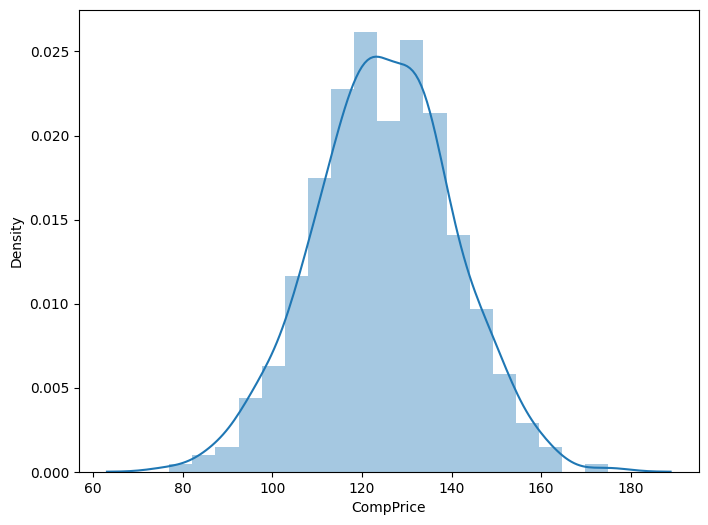

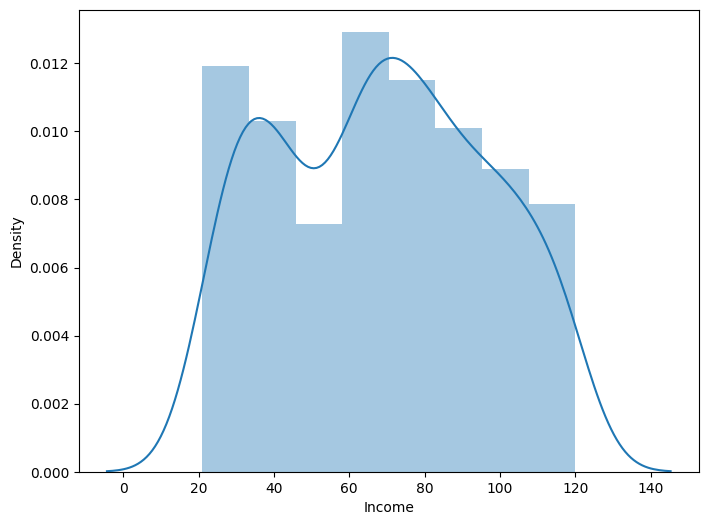

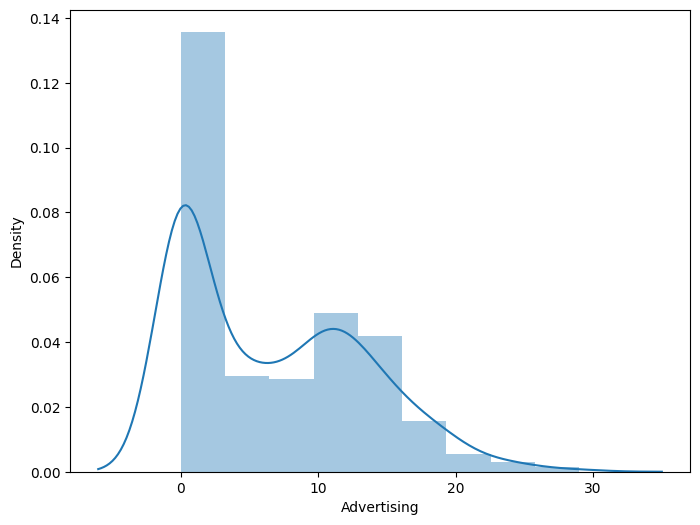

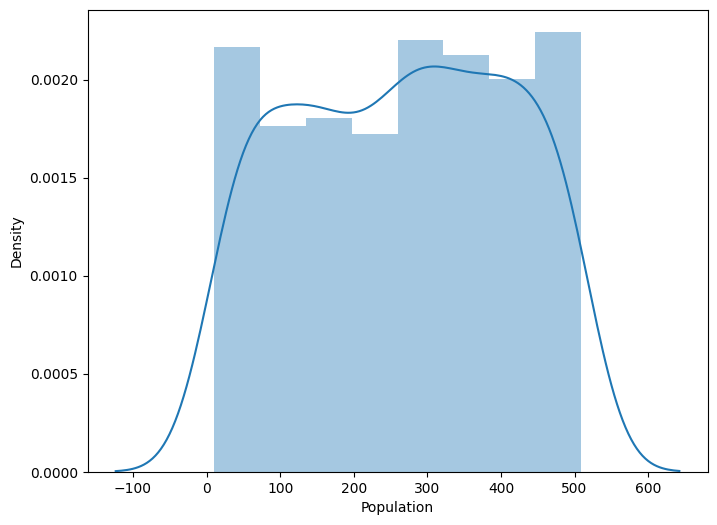

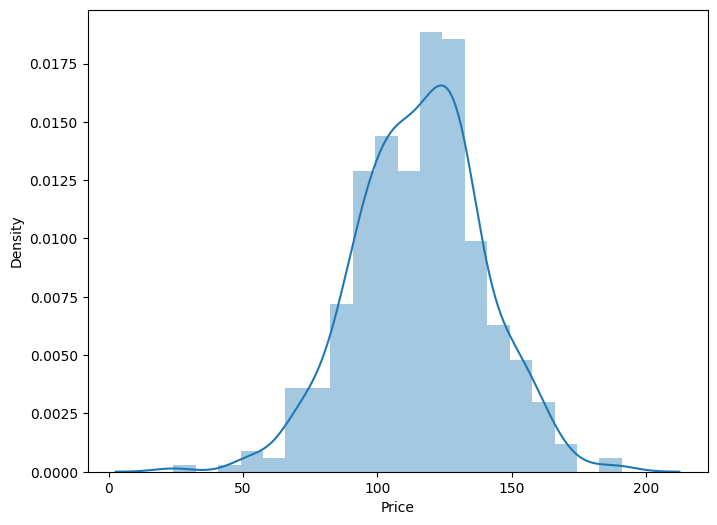

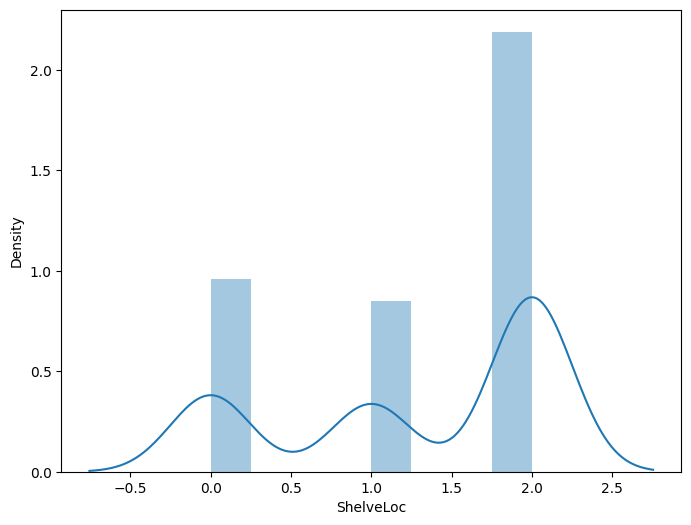

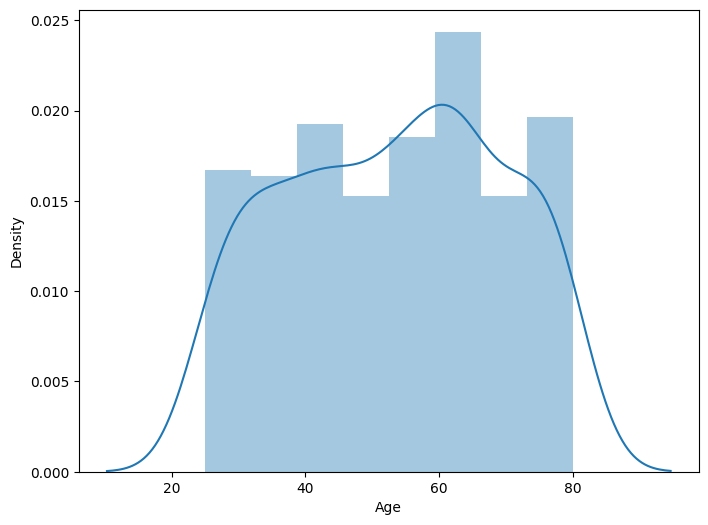

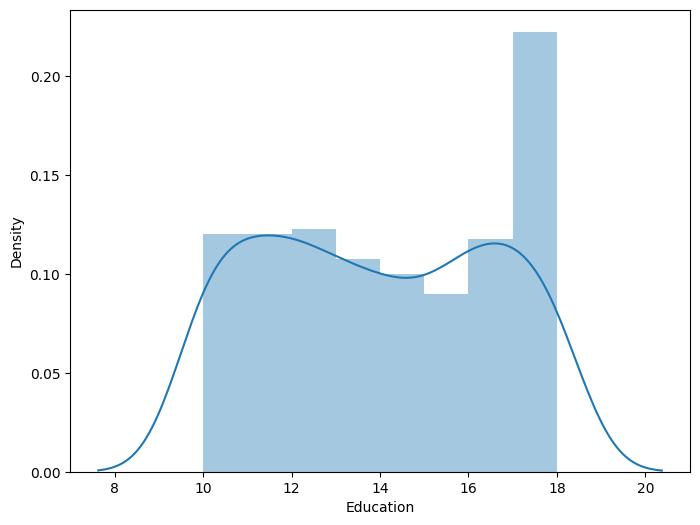

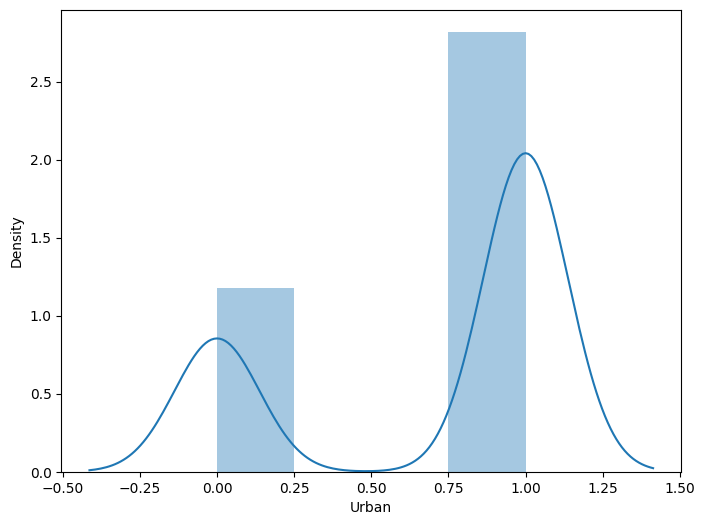

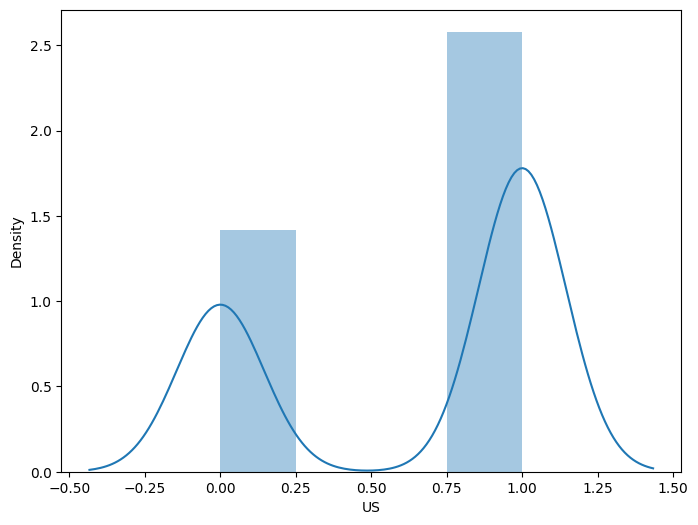

In [31]:
# Checking the distribution of Each column
for i in df.columns:
    plt.figure(figsize=(8,6))
    sns.distplot(df[i])

In [34]:
# Separting the Independent and dependent variables

X = df.iloc[:,:-1]
X
Y = df.iloc[:,-1]
Y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US, Length: 400, dtype: int32

In [37]:
# Scaling the data to convert into equal scale

from sklearn.preprocessing import StandardScaler

encode = StandardScaler()
X = pd.DataFrame(encode.fit_transform(X),columns=X.columns) 
X.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,1.010051,0.850455,0.155361,0.657177,0.075819,0.177823,-1.570698,-0.699782,1.184449,0.646869
1,1.010051,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-0.369399,0.721723,-1.490113,0.646869
2,1.010051,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.831899,0.350895,-0.725953,0.646869
3,-0.990050,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.831899,0.103677,0.038208,0.646869
4,-0.990050,1.046337,-0.166631,-0.547271,0.510625,0.516132,-1.570698,-0.947000,-0.343872,0.646869


In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)

In [44]:
# Fitting Model with training Dataset

from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier(criterion='gini',random_state=0)
Tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

0.775


<Axes: >

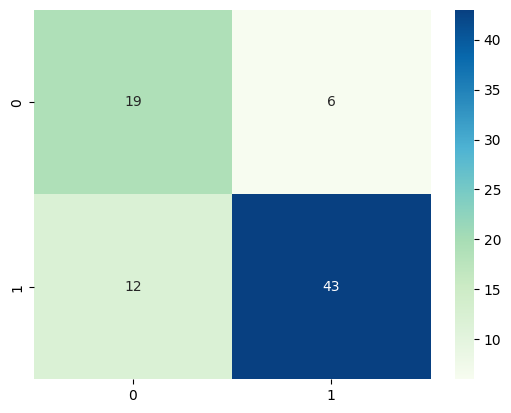

In [47]:
# Predicting the Model Accuracy 
from sklearn.metrics import accuracy_score,confusion_matrix

print(accuracy_score(y_test,Tree.predict(X_test)))
sns.heatmap(confusion_matrix(y_test,Tree.predict(X_test)),annot=True,cmap="GnBu")

In [49]:
# Accuracy By using Kfold ,crossval_score

from sklearn.model_selection import KFold,cross_val_score

k = KFold()
model = DecisionTreeClassifier(criterion='gini',random_state=0)
result = cross_val_score(model,X,Y,cv=k)
print(np.mean(result))


0.8550000000000001


[Text(0.4253246753246753, 0.9583333333333334, 'x[3] <= -0.924\ngini = 0.464\nsamples = 320\nvalue = [117, 203]'),
 Text(0.12987012987012986, 0.875, 'x[4] <= -1.578\ngini = 0.233\nsamples = 119\nvalue = [103, 16]'),
 Text(0.07792207792207792, 0.7916666666666666, 'x[2] <= 0.084\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.05194805194805195, 0.7083333333333334, 'x[2] <= -1.204\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.025974025974025976, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07792207792207792, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.1038961038961039, 0.7083333333333334, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.18181818181818182, 0.7916666666666666, 'x[2] <= -0.936\ngini = 0.194\nsamples = 110\nvalue = [98, 12]'),
 Text(0.15584415584415584, 0.7083333333333334, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.2077922077922078, 0.7083333333333334, 'x[2] <= -0.9\ngini = 0.255\nsamples = 80\nvalue = [68, 12]'),
 Text(0

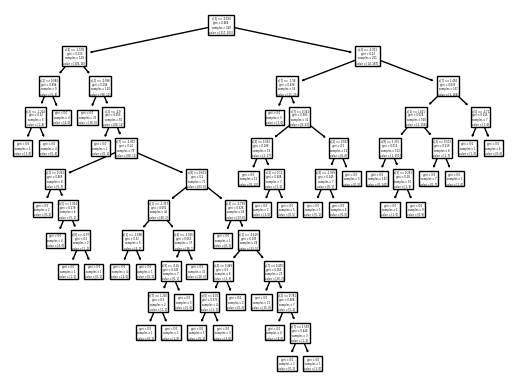

In [52]:
from sklearn import tree
tree.plot_tree(Tree)